In [ ]:
# analysis_notebook.ipynb

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# Save model
import joblib


In [2]:
# Load dataset
df = pd.read_csv("synthetic_students.csv")

# Display first rows
df.head()


,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,1,Rachel,Class A,88,94,94,97,82,69
1,2,Jessica,Class D,51,98,42,53,54,57
2,3,Matthew,Class A,44,52,72,66,59,52
3,4,Mark,Class D,88,84,70,79,76,70
4,5,Karen,Class B,70,65,87,46,56,79


In [3]:
# Shape of dataset
print("Dataset shape:", df.shape)

# Summary statistics
print("\nSummary:")
print(df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (250, 9)

Summary:
       student_id  comprehension   attention       focus   retention  \
count  250.000000      250.00000  250.000000  250.000000  250.000000   
mean   125.500000       68.57200   65.344000   67.692000   69.208000   
std     72.312977       16.88387   21.701185   17.633402   17.609233   
min      1.000000       40.00000   30.000000   35.000000   40.000000   
25%     63.250000       54.00000   46.250000   53.000000   55.250000   
50%    125.500000       68.00000   66.000000   69.000000   68.000000   
75%    187.750000       82.75000   85.000000   83.000000   84.000000   
max    250.000000      100.00000  100.000000  100.000000  100.000000   

       assessment_score  engagement_time  
count        250.000000       250.000000  
mean          65.984000        69.224000  
std            9.842114        26.269797  
min           43.000000        21.000000  
25%           59.000000        48.500000  
50%           65.000000        68.500000  
75%           72

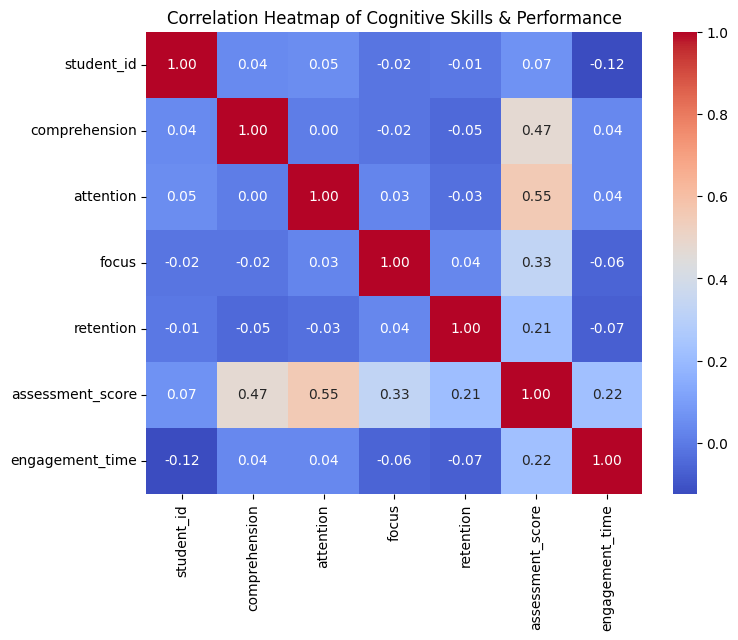

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cognitive Skills & Performance")
plt.show()


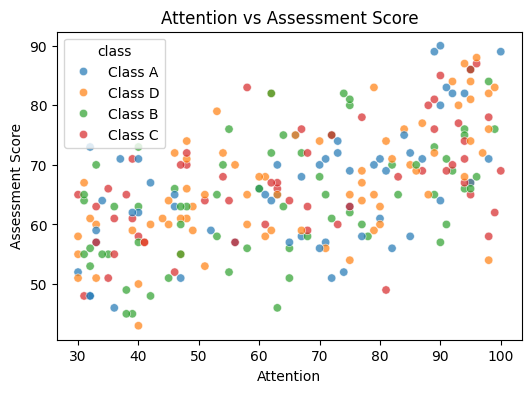

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="attention", y="assessment_score", hue="class", alpha=0.7)
plt.title("Attention vs Assessment Score")
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.show()


Random Forest Performance:
✅ RMSE: 5.53
✅ R²: 0.68


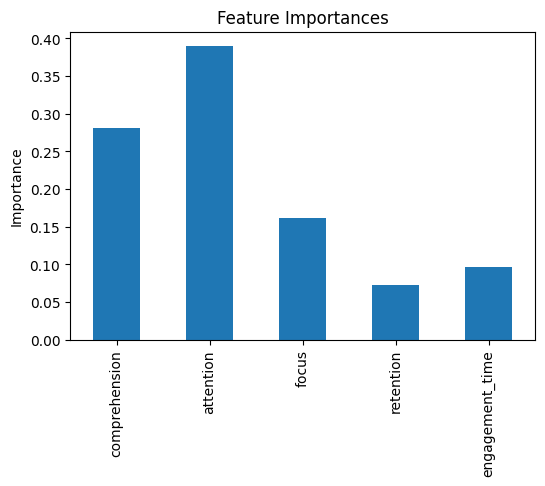

In [7]:
# Features (only numeric skill columns, exclude student_id)
X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print("✅ RMSE:", round(rmse, 2))
print("✅ R²:", round(r2, 3))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importances.plot(kind="bar", title="Feature Importances")
plt.ylabel("Importance")
plt.show()


Cluster centers:
    comprehension  attention      focus  retention  engagement_time
0      68.536842  70.336842  66.684211  66.600000        96.494737
1      65.142857  81.272727  70.753247  71.025974        47.012987
2      72.000000  43.538462  65.897436  70.589744        57.935897


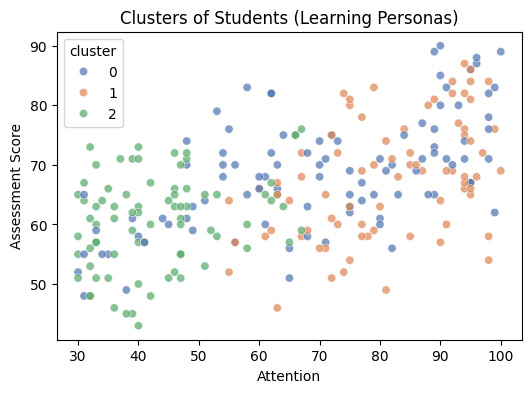

In [8]:
from sklearn.cluster import KMeans

# Use the same skill features for clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

# Show cluster centers
print("Cluster centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

# Scatter plot: attention vs score colored by cluster
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="attention", y="assessment_score", hue="cluster", palette="deep", alpha=0.7)
plt.title("Clusters of Students (Learning Personas)")
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.show()


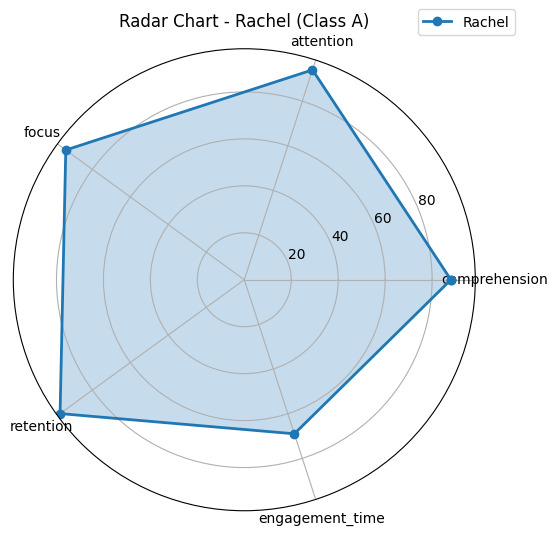

In [9]:
# Example: first student
student = df.iloc[0]

skills = ["comprehension", "attention", "focus", "retention", "engagement_time"]
values = student[skills].values.tolist()

# Repeat first value to close radar chart loop
values += values[:1]
angles = np.linspace(0, 2*np.pi, len(skills), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2, label=student["name"])
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)
ax.set_title(f"Radar Chart - {student['name']} ({student['class']})")
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
plt.show()


In [10]:
print("🔑 Key Insights:")
print("- Comprehension & Attention are the strongest predictors of assessment score.")
print("- Students with Attention < 50 often score below 60 in assessments.")
print("- KMeans grouped students into 3 distinct learning personas (low, medium, high performers).")
print("- Engagement time plays a smaller but noticeable role in performance.")


🔑 Key Insights:
- Comprehension & Attention are the strongest predictors of assessment score.
- Students with Attention < 50 often score below 60 in assessments.
- KMeans grouped students into 3 distinct learning personas (low, medium, high performers).
- Engagement time plays a smaller but noticeable role in performance.
